# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

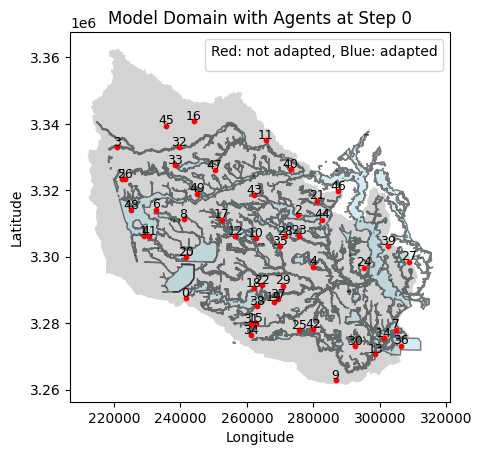

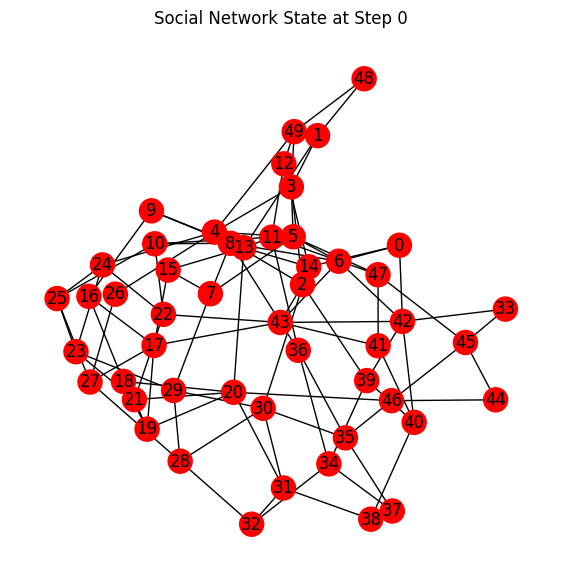

<Figure size 1000x600 with 0 Axes>

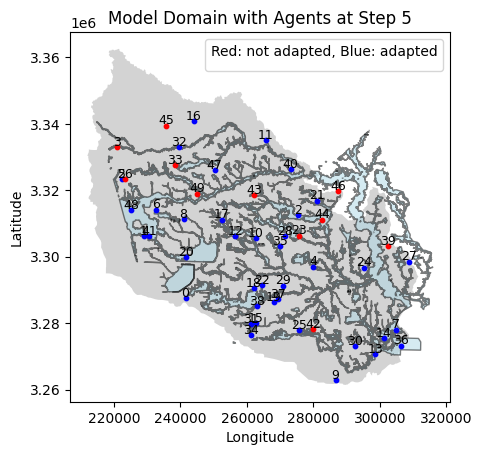

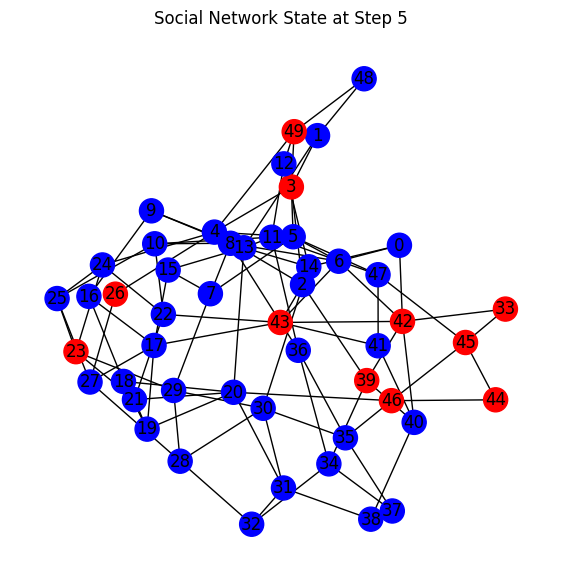

<Figure size 1000x600 with 0 Axes>

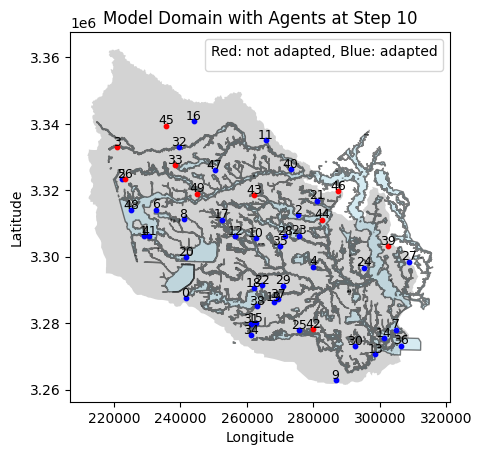

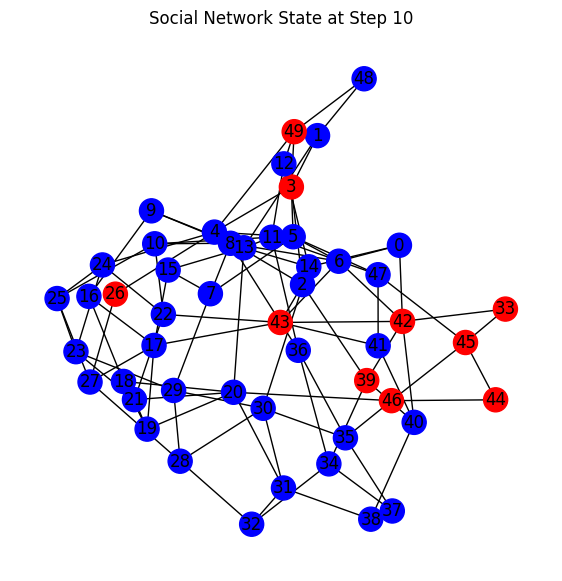

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, number_of_steps = 20, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(model.number_of_steps):
    model.step()

    if step == model.flood_step:
        break

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

The KPI's are: 
FloodDamageEstimated/FloodDamageActual
CostOfAdaptation
Income/IncomeLabel

Eventually, we could reduce the following dataframe even more. However, it is nice to see the full picture of the agents in this matter. Something to discuss. 

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.675898         143944.463074          0.000000   
     1                   0.768913         119625.978846          0.000000   
     2                   0.844925          84855.681309          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.581791         101666.847275          0.000000   
...                           ...                   ...               ...   
11   45                  3.066673         160273.919928          1.970989   
     46                  0.870974         129357.585337          0.893888   
     47                  0.221669          65573.122688          0.149840   
     48                  0.027551           1953.004605          0.027806   
     49                  5.699852         191331.222065          6.136495   

              FloodDamageActual OptimalMeasure  IsAdapted  CostOfAdaptation  \
Step AgentID                                                                  
0    0                 0.000000           None      False                 0   
     1                 0.000000           None      False                 0   
     2                 0.000000           None      False                 0   
     3                 0.000000           None      False                 0   
     4                 0.000000           None      False                 0   
...                         ...            ...        ...               ...   
11   45           145616.184763           None      False                 0   
     46           130297.270937           None      False                 0   
     47            53934.904906     Sandbags_1       True              1080   
     48             2101.497661       Drains_0       True              3510   
     49           200940.000000           None      False                 0   

               IncomeLabel  Income  Savings  OwnFloodPerception  \
Step AgentID                                                      
0    0        Middle-Class   19225      0.0                   4   
     1        Middle-Class   42571      0.0                   3   
     2        Middle-Class   29593      0.0                   1   
     3                Rich   85233      0.0                   1   
     4        Middle-Class   36172      0.0                   1   
...                    ...     ...      ...                 ...   
11   45       Middle-Class   19677      0.0                   1   
     46       Middle-Class   15037      0.0                   1   
     47       Middle-Class   34406    640.3                   2   
     48       Middle-Class   35794     69.4                   2   
     49       Middle-Class   42500      0.0                   2   

              NetworkPerception  
Step AgentID                     
0    0                        0  
     1                        0  
     2                        0  
     3                        0  
     4                        0  
...                         ...  
11   45                       1  
     46                       1  
     47                       2  
     48                       2  
     49                       2  

[600 rows x 12 columns]

In [3]:
#step19 = agent_data.loc[19, :][['FloodDamageEstimated', 'OptimalMeasure', 'IsAdapted']]
#step19

In [4]:
#step20 = agent_data.loc[19, :][['FloodDamageActual', 'IsAdapted']]
#step20

If you want to investigate a single agent, change the number behind key= and in the slice to the same number
This will give you the agent you want to investigate
For instance, look at the graph and the blue numbers, pick one out, and investigate how many steps it takes to save up for a measure
Or, to see how the perception changes (barely overtime, but that is the discreet nature of it)

In [5]:
result_df_xs = agent_data.xs(key=49, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 49), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,OptimalMeasure,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,
0,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,4,0
1,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,4,4
2,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
3,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
4,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
5,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
6,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
7,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2
8,49,5.699852,191331.222065,0.000000,0.0,None,False,0,Middle-Class,42500,0.0,2,2


In [6]:
print('The model flooded at step', model.flood_step)

The model flooded at step 11


In [7]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,18
2,29
3,37
4,39
5,39
6,39
7,39
8,39
9,39
